---

##**Visualización de datos en Python** <br><br>
## Segunda entrega corregida
###24 de Mayo de 2022

---

Lady Tatiana Arévalo López - **Cod:** 2213306 <br><br>
Laura Viviana Pascagaza Páez- **Cod:** 2241541<br><br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
from matplotlib import cm

In [2]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(12.7,8.6)})

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


La base de datos con la que se desarrolla este trabajo, tiene como nombre, **Violencia de Género e intrafamiliar**, recopila información desde el año 2015 hasta el 2021 según naturaleza de la violencia acoso sexual, abuso sexual, negligencia y abandono, violencia física y violencia psicológica.


In [4]:
Genero = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Violencia_de_G_nero2.csv', 
                 sep = ';',
                 index_col=0,
                 encoding='latin-1'
                 )
Genero

Departamento    Municipio  semana   año Grupo edad  Ciclo de vida  \
Orden                                                                     
249      SANTANDER  BUCARAMANGA      13  2015    18 a 28        Jovenes   
267      SANTANDER  BUCARAMANGA      38  2015    18 a 28        Jovenes   
362      SANTANDER  BUCARAMANGA       1  2015   60 y mas  Persona Mayor   
267      SANTANDER  BUCARAMANGA       1  2015    18 a 28        Jovenes   
283      SANTANDER  BUCARAMANGA       1  2015     6 a 11       Infancia   
...            ...          ...     ...   ...        ...            ...   
774      SANTANDER  BUCARAMANGA      53  2021    18 a 28        Jovenes   
775      SANTANDER  BUCARAMANGA      53  2021    29 a 59        Adultez   
778      SANTANDER  BUCARAMANGA      53  2021    12 a 17   Adolescencia   
779      SANTANDER  BUCARAMANGA      53  2021     6 a 11       Infancia   
787      SANTANDER  BUCARAMANGA      53  2021    12 a 17   Adolescencia   

           sexo_                area_            Barrio  \
Orden                                                     
249     Femenino  CABECERA  MUNICIPAL  Sin InformaciÃ³n   
267     Femenino  CABECERA  MUNICIPAL  Sin InformaciÃ³n   
362     Femenino  CABECERA  MUNICIPAL  Sin InformaciÃ³n   
267     Femenino  CABECERA  MUNICIPAL  LUZ DE ESPERANZA   
283     Femenino  CABECERA  MUNICIPAL   MANUELA BELTRAN   
...          ...                  ...               ...   
774     Femenino  CABECERA  MUNICIPAL       BETANIA III   
775     Femenino  CABECERA  MUNICIPAL           BETANIA   
778    Masculino  CABECERA  MUNICIPAL  Sin InformaciÃ³n   
779     Femenino  CABECERA  MUNICIPAL           LA JOYA   
787     Femenino  CABECERA  MUNICIPAL       LOS CANELOS   

                      Comuna Tipo de Seguridad Social  pac_hos_ con_fin_  \
Orden                                                                      
249         Sin informaciÃ³n               Subsidiado         2     VIVO   
267         Sin informaciÃ³n             Contributivo         1     VIVO   
362         Sin informaciÃ³n               Subsidiado         2     VIVO   
267                  1 NORTE             Contributivo         1     VIVO   
283                   11 SUR               Subsidiado         1     VIVO   
...                      ...                      ...       ...      ...   
774          3 SAN FRANCISCO             Contributivo         2     VIVO   
775    12 CABECERA DEL LLANO             Contributivo         2     VIVO   
778                 17 MUTIS             Contributivo         2     VIVO   
779         5 GARCÃA ROVIRA             Contributivo         2     VIVO   
787         5 GARCÃA ROVIRA               Subsidiado         1     VIVO   

                              version  naturaleza          def_naturaleza  \
Orden                                                                       
249          SIVIGILA - 2015 - 15.1.3           1        Violencia fisica   
267          SIVIGILA - 2015 - 15.1.3           3  Negligencia y abandono   
362          SIVIGILA - 2015 - 15.1.0           3  Negligencia y abandono   
267          SIVIGILA - 2015 - 15.1.0           3  Negligencia y abandono   
283          SIVIGILA - 2015 - 15.1.0           4            Abuso sexual   
...                               ...         ...                     ...   
774    SIVIGILA - 2018 -18.1.10$0$0.2           1        Violencia fisica   
775    SIVIGILA - 2018 -18.1.10$0$0.2           1        Violencia fisica   
778    SIVIGILA - 2018 -18.1.10$0$0.2           3        Violencia fisica   
779    SIVIGILA - 2018 -18.1.10$0$0.2           3        Violencia fisica   
787    SIVIGILA - 2018 -18.1.10$0$0.2           3  Negligencia y abandono   

       actividad                          nom_actividad  edad_agre  sexo_agre  \
Orden                                                                           
249           26                                   Otro       32.0  MASCULINO   
267           26            

# **Limpieza de datos**

A continuación, se observa el tipo de atributos que tiene la base de datos. 

In [ ]:
Genero.dtypes 

Departamento                 object
Municipio                    object
semana                        int64
año                           int64
Grupo edad                   object
Ciclo de vida                object
sexo_                        object
area_                        object
Barrio                       object
Comuna                       object
Tipo de Seguridad Social     object
pac_hos_                      int64
con_fin_                     object
version                      object
naturaleza                    int64
def_naturaleza               object
actividad                     int64
nom_actividad                object
edad_agre                   float64
sexo_agre                    object
parentezco_vict              object
parentezco_vict_agrupada     object
sust_vict                   float64
fec_hecho                    object
hora_hecho                   object
escenario                     int64
zona_conf                   float64
nom_eve                     

Se observa que: 

* La variable fec_hecho es de tipo "object" en lugar de "fecha", esta debe ser tranformada. 
* Se realizó una agrupación de la información contenida en la variable "parentezco_vict" la cual se almacenó en la variable "parentezco_vict_agrupada", es posible eliminar la variable original. 

In [ ]:
Genero.drop(["parentezco_vict"],axis=1, inplace = True)

# Evaluo **Completitud**

Idetifico si hay datos perdidos en las variables de la base de datos.

In [ ]:
for col in Genero.columns:
    num_missing = Genero[col].isnull().sum()
    pct_missing = np.mean(Genero[col].isnull())
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

Departamento - 0.0% - 0
Municipio - 0.0% - 0
semana - 0.0% - 0
año - 0.0% - 0
Grupo edad - 0.0% - 0
Ciclo de vida - 0.0% - 0
sexo_ - 0.0% - 0
area_ - 0.0% - 0
Barrio - 0.16% - 14
Comuna - 0.0% - 0
Tipo de Seguridad Social - 0.0% - 0
pac_hos_ - 0.0% - 0
con_fin_ - 0.0% - 0
version - 0.0% - 0
naturaleza - 0.0% - 0
def_naturaleza - 0.0% - 0
actividad - 0.0% - 0
nom_actividad - 0.0% - 0
edad_agre - 17.07% - 1501
sexo_agre - 0.0% - 0
parentezco_vict_agrupada - 0.0% - 0
sust_vict - 13.41% - 1179
fec_hecho - 0.0% - 0
hora_hecho - 0.0% - 0
escenario - 0.0% - 0
zona_conf - 13.41% - 1179
nom_eve - 0.0% - 0
nom_upgd - 0.05% - 4
ndep_resi - 0.0% - 0
nmun_resi - 0.0% - 0
MES - 0.0% - 0
fecha_hecho - 0.0% - 0
CONTEO - 0.0% - 0


Se puede observar que en las variables: 


* Barrio: (barrio donde reside la victima) tiene 14 datos perdidos
* edad_agre: (edad del agresor) tiene 1501 datos perdidos que equivalen al 17.07%
* sust_vict: (Presencia de alcohol u otra sustancia en la Víctima) tiene 1179 datos perdidos que equivalen a 13.41%.
* zona_conf: (sitio donde posiblemente la victima se expuso a la violencia ) tiene 1179 datos perdidos que equivalen al 13.41%
* nom_upgd: (la entidad pública o privada que capta la ocurrencia de eventos de interés en salud pública) tiene 4 datos perdidos. 



In [ ]:
Genero[Genero["edad_agre"].isnull() == True]

Departamento    Municipio  semana   año Grupo edad     Ciclo de vida  \
Orden                                                                        
716      SANTANDER  BUCARAMANGA      40  2015      1 a 5  Primera infancia   
522      SANTANDER  BUCARAMANGA      51  2016    29 a 59           Adultez   
17       SANTANDER  BUCARAMANGA      45  2018    18 a 28           Jovenes   
454      SANTANDER  BUCARAMANGA      44  2018    18 a 28           Jovenes   
936      SANTANDER  BUCARAMANGA      47  2018      1 a 5  Primera infancia   
...            ...          ...     ...   ...        ...               ...   
774      SANTANDER  BUCARAMANGA      53  2021    18 a 28           Jovenes   
775      SANTANDER  BUCARAMANGA      53  2021    29 a 59           Adultez   
778      SANTANDER  BUCARAMANGA      53  2021    12 a 17      Adolescencia   
779      SANTANDER  BUCARAMANGA      53  2021     6 a 11          Infancia   
787      SANTANDER  BUCARAMANGA      53  2021    12 a 17      Adolescencia   

           sexo_                area_            Barrio  \
Orden                                                     
716    Masculino  CABECERA  MUNICIPAL   VILLA DEL PRADO   
522     Femenino       RURAL DISPERSO  Sin InformaciÃ³n   
17      Femenino  CABECERA  MUNICIPAL         EL GAITAN   
454     Femenino  CABECERA  MUNICIPAL          PORVENIR   
936     Femenino  CABECERA  MUNICIPAL        COAVICONSA   
...          ...                  ...               ...   
774     Femenino  CABECERA  MUNICIPAL       BETANIA III   
775     Femenino  CABECERA  MUNICIPAL           BETANIA   
778    Masculino  CABECERA  MUNICIPAL  Sin InformaciÃ³n   
779     Femenino  CABECERA  MUNICIPAL           LA JOYA   
787     Femenino  CABECERA  MUNICIPAL       LOS CANELOS   

                      Comuna Tipo de Seguridad Social  pac_hos_ con_fin_  \
Orden                                                                      
716         Sin InformaciÃ³n             Contributivo         2     VIVO   
522         Sin InformaciÃ³n               Subsidiado         2     VIVO   
17          Sin InformaciÃ³n               Subsidiado         2     VIVO   
454         Sin InformaciÃ³n               Subsidiado         2     VIVO   
936         Sin InformaciÃ³n             Contributivo         1     VIVO   
...                      ...                      ...       ...      ...   
774          3 SAN FRANCISCO             Contributivo         2     VIVO   
775    12 CABECERA DEL LLANO             Contributivo         2     VIVO   
778                 17 MUTIS             Contributivo         2     VIVO   
779         5 GARCÃA ROVIRA             Contributivo         2     VIVO   
787         5 GARCÃA ROVIRA               Subsidiado         1     VIVO   

                              version  naturaleza          def_naturaleza  \
Orden                                                                       
716     SIVIGILA - 2018 -18.1.5$0$2.4           1        Violencia fisica   
522     SIVIGILA - 2018 -18.1.5$0$2.7           1        Violencia fisica   
17           SIVIGILA - 2018 - 18.1.5           2   Violencia psicologica   
454     SIVIGILA - 2018 -18.1.5$0$2.4           1        Violencia fisica   
936     SIVIGILA - 2018 -18.1.5$0$2.7           3  Negligencia y abandono   
...                               ...         ...                     ...   
774    SIVIGILA - 2018 -18.1.10$0$0.2           1        Violencia fisica   
775    SIVIGILA - 2018 -18.1.10$0$0.2           1        Violencia fisica   
778    SIVIGILA - 2018 -18.1.10$0$0.2           3        Violencia fisica   
779    SIVIGILA - 2018 -18.1.10$0$0.2           3        Violencia fisica   
787    SIVIGILA - 2018 -18.1.10$0$0.2           3  Negligencia y abandono   

       actividad                          nom_actividad  edad_agre  sexo_agre  \
Orden                                                                           
716           24                             Estudiante        NaN  MA

Al observar la tabla filtrada por valores faltantes en la variable "edad_agre" (edad del agresor), se puede identificar que la variable "sexo_agre" (sexo del agresor) tiene cuatro categorías que se refieren a 2 generos, por lo que es necesario corregir este error. 

Cambiar de (Femenino,Masculino,FEMENINO,MASCULINO) a (Femenino y Masculino), proceso que se realizará más adelante en la sección de duplicados. 

In [ ]:
print('Antes de borrar registros: ',Genero.shape)
for col in Genero.columns:
    num_missing = Genero[col].isnull().sum()
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        Genero['{}_ismissing'.format(col)] = num_missing
ismissing_cols = [col for col in Genero.columns if 'ismissing' in col]
#Genero['num_missing'] = Genero[ismissing_cols].sum(axis=1)

Antes de borrar registros:  (8795, 33)
created missing indicator for: Barrio
created missing indicator for: edad_agre
created missing indicator for: sust_vict
created missing indicator for: zona_conf
created missing indicator for: nom_upgd


# Duplicados

In [ ]:
Genero['sexo_agre'].value_counts()

MASCULINO      4757
FEMENINO       3913
SIN DEFINIR     100
Masculino        16
Femenino          9
Name: sexo_agre, dtype: int64

Se puede observar que existen 5 categorías para el sexo del agresor, sin embargo esto es incorrecto, pues se podría considerar que para el sexo masculino como para el femenino existe un duplicado, por lo que se realiza lo siguiente: 

In [ ]:
Genero['sexo_agre'] = Genero['sexo_agre'].str.lower() 

In [ ]:
Genero['sexo_agre'].value_counts()

masculino      4773
femenino       3922
sin definir     100
Name: sexo_agre, dtype: int64

Ahora existen 3 categorías para el sexo del agresor, masculino, femenino y sin definir. 

## **Limpieza de fechas**

La base **Violencia de Género e intrafamiliar** contiene la variable **fec_hecho** en la que se encuentra información temporal sobre la fecha en la que ocurrió el hecho de violencia. 

A continuación se hace una separación de la información que se encontraba en cada registro de la fecha en la que ocurrieron los hechos, esto debido a que se encontraba la fecha, hora y en algunos casos A.M, esto se hace ya que únicamente se desea trabajar con la fecha. 

In [ ]:
fecha =Genero["fec_hecho"].str.split(expand=True)
fecha

0     1     2
Orden                       
249    1/01/2015  0:00  None
267    1/01/2015  0:00  None
362    1/04/2015  0:00  None
267    1/04/2015  0:00  None
283    1/04/2015  0:00  None
...          ...   ...   ...
774    1/01/2021  0:00  None
775    1/01/2021  0:00  None
778    1/01/2021  0:00  None
779    1/02/2021  0:00  None
787    1/02/2021  0:00  None

[8795 rows x 3 columns]

Se selecciona la primera columna y esta información se almacena en una nueva columna con nombre "fecha_hecho"

In [ ]:
Genero["fecha_hecho"] = fecha.iloc[:, 0]

Se desea conocer si todas las fechas tienen la misma longitud, para esto se hace un conteo de dígitos y se descubre que existen 2993 registros con 9 dígitos.

In [ ]:
Genero["CONTEO"]=Genero.fecha_hecho.apply(lambda x: len(str(x)))
Genero["CONTEO"].value_counts()

10    5802
9     2993
Name: CONTEO, dtype: int64

Por tanto, se filtra la base con los registros que tienen 9 dígitos en la fecha.

In [ ]:
base_prueba = Genero[Genero["CONTEO"]==9]

Ahora, en la variable "fecha_hecho" se corrigen las fechas con 9 dígitos, añadiendo un cero antes de la fecha original, así ya tendra 10 dígitos. 

In [ ]:
base_prueba["fecha_hecho"] = '0' + base_prueba["fecha_hecho"].astype(str)

Se filtran las fechas con 10 dígitos.

In [ ]:
fecha10 = Genero[Genero["CONTEO"]==10]

Se unen las bases filtradas. 

In [ ]:
Genero = pd.concat([base_prueba, fecha10])

Se hace una verificación de la cantidad de dígitos por fecha y se observa que todos los registros, tienen la misma cantidad. 

In [ ]:
Genero["CONTEO"]=Genero.fecha_hecho.apply(lambda x: len(str(x)))
Genero["CONTEO"].value_counts()

10    8795
Name: CONTEO, dtype: int64

Se hace limpieza de fecha.

In [ ]:
Genero['fecha_hecho'] = pd.to_datetime(Genero['fecha_hecho'],format='%m/%d/%Y')
Genero['fecha_hecho'].head()

Orden
249   2015-01-01
267   2015-01-01
362   2015-01-04
267   2015-01-04
283   2015-01-04
Name: fecha_hecho, dtype: datetime64[ns]

In [ ]:
Genero.drop(['CONTEO'],axis=1, inplace = True)

#Visualizaciones espaciales. 

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade topojson
!pip install --upgrade plotly

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/be6a6e239cd5b5b803c6e7c2ec405b793a9064dd/Colombia.geo.json') as response:
    departamentos = json.load(response)

print(departamentos['features'])

[{'type': 'Feature', 'properties': {'DPTO': '05', 'NOMBRE_DPT': 'ANTIOQUIA', 'AREA': 63351855546.895, 'PERIMETER': 1963728.843, 'HECTARES': 6335185.555}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-76.30729675220047, 8.619299889431787], [-76.29810333270866, 8.616399764640406], [-76.2917022709176, 8.617500305932477], [-76.27619934020201, 8.60879993391571], [-76.26290130676628, 8.603500365680683], [-76.25189971939517, 8.593600272668734], [-76.2397994998317, 8.58959960902182], [-76.22709655816153, 8.583700180478338], [-76.2276992798516, 8.579099655292133], [-76.21730041464741, 8.571599959760825], [-76.21620178287812, 8.56400012950135], [-76.2144012458417, 8.551300048733623], [-76.21209716764655, 8.53460025816843], [-76.2115020744161, 8.521900177648424], [-76.20809936534768, 8.50100040489879], [-76.20520019535385, 8.487700462096564], [-76.20169830239917, 8.471599578043385], [-76.20059966999881, 8.46399974867111], [-76.19770050024864, 8.451299668030343], [-76.19589996263814, 8.437999

# Mapa 1 

In [ ]:
pd.crosstab(Genero["ndep_resi"],Genero["año"])

año              2015  2016  2017  2018  2019  2020  2021
ndep_resi                                                
AMAZONAS            0     1     1     0     0     0     0
ANTIOQUIA           0     1     0     0     0     0     0
ARAUCA              0     0     0     0     0     1     0
BOGOTA              0     0     0     0     0     1     0
BOLIVAR             0     0     1     1     0     0     0
BOYACA              0     0     3     0     0     0     0
CASANARE            1     1     0     0     0     0     0
CESAR               0     1     0     0     0     1     0
CUNDINAMARCA        0     0     1     0     0     1     0
EXTERIOR            1     0     3     3     0     0     0
HUILA               0     1     1     0     0     1     0
MAGDALENA           0     0     0     0     0     1     0
NORTE SANTANDER     0     1     2     0     0     1     0
PUTUMAYO            0     0     0     0     0     1     0
RISARALDA           0     0     0     0     0     1     0
SANTANDER        1831  2161  1414  1142  1261   941     7
TOLIMA              0     1     0     0     0     1     0
VALLE               0     0     0     0     1     2     0

In [ ]:
ID = ["13","68","68","76","81","11","20","25","41","47","54","86","66","68","73","76"]
dep = ["BOLIVAR","SANTANDER","SANTANDER","VALLE","ARAUCA","BOGOTA","CESAR","CUNDINAMARCA","HUILA","MAGDALENA","NORTE DE SANTANDER","PUTUMAYO","RISARALDA","SANTANDER","TOLIMA","VALLE"]
casos = [1,1142,1261,1,1,1,1,1,1,1,1,1,1,941,1,2]
año = ["2018","2018","2019","2019","2020","2020","2020","2020","2020","2020","2020","2020","2020","2020","2020","2020"]
lat = [8.71629,	6.672611,	6.672611,3.862996,6.533712,4.286616,9.525214,	4.796094,2.535022,	10.22522,8.061736,0.4357213,5.065642,	6.672611,4.040248,3.862996]
lon = [-74.51479,-73.5116,-73.5116,-76.53093,-70.98388,-74.21088,-73.53562,-74.11696,-75.63745,-74.27984,-72.90671,-75.8626,-75.91833,-73.5116,-75.2635,-76.53093]

nuevo = pd.DataFrame({'id':ID ,
                   'Departamento':dep,
                   'lat': lat,
                   "lon": lon,
                   "Casos": casos,
                   "Año": año})

nuevo

id        Departamento        lat       lon  Casos   Año
0   13             BOLIVAR   8.716290 -74.51479      1  2018
1   68           SANTANDER   6.672611 -73.51160   1142  2018
2   68           SANTANDER   6.672611 -73.51160   1261  2019
3   76               VALLE   3.862996 -76.53093      1  2019
4   81              ARAUCA   6.533712 -70.98388      1  2020
5   11              BOGOTA   4.286616 -74.21088      1  2020
6   20               CESAR   9.525214 -73.53562      1  2020
7   25        CUNDINAMARCA   4.796094 -74.11696      1  2020
8   41               HUILA   2.535022 -75.63745      1  2020
9   47           MAGDALENA  10.225220 -74.27984      1  2020
10  54  NORTE DE SANTANDER   8.061736 -72.90671      1  2020
11  86            PUTUMAYO   0.435721 -75.86260      1  2020
12  66           RISARALDA   5.065642 -75.91833      1  2020
13  68           SANTANDER   6.672611 -73.51160    941  2020
14  73              TOLIMA   4.040248 -75.26350      1  2020
15  76               VALLE   3.862996 -76.53093      2  2020

In [ ]:
import plotly.figure_factory as ff
fig = ff.create_hexbin_mapbox(nuevo, 
                              #locations='id',   #preguntarle como podemos poner el nombre de cada departamento
                              lat="lat", 
                              lon="lon",
                              color='Casos',
                              #labels = 'Departamento',
                              animation_frame='Año',
                              nx_hexagon=10,
                              opacity=0.5,
                              min_count=1
)
#fig.show()

fig.update_layout(
        title_text = 'Casos de violencia por Departamento',
        showlegend = True,
        geo = dict(
            scope = 'south america',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

**¿Qué tareas se puede hacer con la visualización?**

Evidenciar la cantidad de casos de violencia de género e intrafamiliar para los años 2018,2019 y 2020 para algunos departamentos de Colombia. 
Identificar el departamento con mayor casos de violencia por año. 

**Descripción de un insight encontrado en la visualización:**

Para los tres años (2018,2019 y 2020) el departamento con mayor numero de casos de violencia es Santander. 
Se puede observar que para el año 2020 es donde más se presentan casos de violencia en diferentes departamentos de Colombia. 


# Mapa 2 

In [ ]:
tabla_2019 = Genero[Genero["año"] == 2019]

In [ ]:
pd.crosstab(tabla_2019["ndep_resi"],tabla_2019["Ciclo de vida"])

Ciclo de vida  Adolescencia  Adultez  Infancia  Jovenes  Persona Mayor  \
ndep_resi                                                                
SANTANDER               111      208       360      190             38   
VALLE                     0        0         0        0              0   

Ciclo de vida  Primera infancia  
ndep_resi                        
SANTANDER                   354  
VALLE                         1

In [ ]:
tabla_2020 = Genero[Genero["año"] == 2020]

In [ ]:
pd.crosstab(tabla_2020["ndep_resi"],tabla_2020["Ciclo de vida"])

Ciclo de vida    Adolescencia  Adultez  Infancia  Jovenes  Persona Mayor  \
ndep_resi                                                                  
ARAUCA                      0        0         0        1              0   
BOGOTA                      0        0         0        0              1   
CESAR                       0        1         0        0              0   
CUNDINAMARCA                0        0         1        0              0   
HUILA                       0        0         0        1              0   
MAGDALENA                   0        0         0        1              0   
NORTE SANTANDER             1        0         0        0              0   
PUTUMAYO                    0        0         1        0              0   
RISARALDA                   0        0         1        0              0   
SANTANDER                 108      211       274      243             33   
TOLIMA                      0        0         1        0              0   
VALLE                       0        0         0        0              2   

Ciclo de vida    Primera infancia  
ndep_resi                          
ARAUCA                          0  
BOGOTA                          0  
CESAR                           0  
CUNDINAMARCA                    0  
HUILA                           0  
MAGDALENA                       0  
NORTE SANTANDER                 0  
PUTUMAYO                        0  
RISARALDA                       0  
SANTANDER                      72  
TOLIMA                          0  
VALLE                           0

In [ ]:
tabla_2021 = Genero[Genero["año"] == 2021]

In [ ]:
pd.crosstab(tabla_2021["ndep_resi"],tabla_2021["Ciclo de vida"])

Ciclo de vida  Adolescencia  Adultez  Infancia  Jovenes
ndep_resi                                              
SANTANDER                 2        2         2        1

In [ ]:
id_D = ["68","68","68","68","68","68","76","54","68","20","68","25","86","66","68","73","81","41","47","68","11","68","76","68","68","68","68","68"]
Departamento_D=["SANTANDER","SANTANDER","SANTANDER","SANTANDER","SANTANDER","SANTANDER","VALLE","NORTE SANTANDER","SANTANDER","CESAR","SANTANDER","CUNDINAMARCA","PUTUMAYO","RISARALDA","SANTANDER","TOLIMA","ARAUCA","HUILA","MAGDALENA","SANTANDER","BOGOTA","SANTANDER","VALLE","SANTANDER","SANTANDER","SANTANDER","SANTANDER","SANTANDER"]
Ciclo_D = ["Adolescencia","Adultez","Infancia","Jovenes","Persona Mayor","Primera infancia","Primera infancia","Adolescencia","Adolescencia","Adultez","Adultez","Infancia","Infancia","Infancia","Infancia","Infancia","Jovenes","Jovenes","Jovenes","Jovenes","Persona Mayor","Persona Mayor","Persona Mayor","Primera infancia","Adolescencia","Adultez","Infancia","Jovenes"]
casos_D=[111,208,360,190,38,354,1,1,108,1,2011,1,1,1,274,1,1,1,1,243,1,33,2,72,2,2,2,1]
año_D=[2019,2019,2019,2019,2019,2019,2019,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2021,2021,2021,2021]
lat_D = [6.672611,6.672611,6.672611,6.672611,6.672611,6.672611,3.862996,8.061736,6.672611,9.525214,6.67261,4.796094,0.4357213,5.065642,6.672611,4.040248,6.533712,2.535022,10.22522,6.672611,4.286616,6.672611,3.862996,6.672611,6.672611,6.672611,6.672611,6.672611]
lon_D=[-73.5116,-73.5116,-73.5116,-73.5116,-73.5116,-73.5116,-76.53093,-72.90671,-73.5116,-73.53562,-73.5116,-74.11696,-75.8626,-75.91833,-73.5116,-75.2635,-70.98388,-75.63745,-74.27984,-73.5116,-74.21088,-73.5116,-76.53093,-73.5116,-73.5116,-73.5116,-73.5116,-73.5116]

mapa_2 = pd.DataFrame({'id':id_D ,
                   'Departamento':Departamento_D,
                   "Ciclo": Ciclo_D,
                   "Casos": casos_D,
                   'lat': lat_D,
                   "lon": lon_D,
                   "Año": año_D})


In [ ]:
import plotly.graph_objects as go
px.set_mapbox_access_token("pk.eyJ1IjoibGF1cmFwYXNjYWdhemEiLCJhIjoiY2wxbXc2aDBwMGk4YjNkdGMzNTBlM2IycyJ9.60-8wvGzFo6HAoAXuPsS-g")

fig = px.scatter_mapbox(mapa_2,
                        lat='lat',
                        lon='lon',
                        hover_name='Departamento',
                        zoom=3,
                        color="Ciclo",
                        size="Casos",
                        animation_frame="Año", 
                        center = {"lat": 4.570868, "lon": -74.297333})
fig.update_layout(
        title_text = 'Casos de violencia por ciclo de vida',
        showlegend = True,
        geo = dict(
            scope = 'south america',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

**¿Qué tareas se puede hacer con la visualización?**

Evidenciar la cantidad de casos de violencia según el ciclo de vida de la víctima por departamento.
Identificar en que ciclo de vida de las victimas es donde se presentan mayores casos de violencia en los departamentos de Colombia.  

**Descripción de un insight encontrado en la visualización:**

Se puede observar que en la animación de esta visualización para los 3 años existen más casos de violencia en la region de Santander, para el caso del año 2020 se puede observar que el ciclo de vida donde se presenta más violencia es en la Adultez con 2011 casos. 
Para el año 2021 disminuyen los casos de violencia, sin embargo, se presentan 72 casos en el ciclo de vida primera infancia para el departamento de Santander. 

# Visualizaciones temporales

# Calendario

In [ ]:
! pip install calplot

In [ ]:
import calplot
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import pandas as pd

In [ ]:
Genero['Ciclo de vida'].value_counts()

Infancia            2609
Primera infancia    2356
Jovenes             1430
Adultez             1283
Adolescencia         868
Persona Mayor        249
Name: Ciclo de vida, dtype: int64

In [ ]:
Genero_SANTANDER = Genero[(Genero['ndep_resi'] == "SANTANDER") & (Genero['Ciclo de vida'] == "Adolescencia")]
Genero["año"].value_counts()

2016    2168
2015    1833
2017    1426
2019    1262
2018    1146
2020     953
2021       7
Name: año, dtype: int64

In [ ]:
Conteo_meses_SANTANDER = pd.pivot_table(Genero_SANTANDER, 
                                values='semana', 
                                index=['fecha_hecho'],
                                columns=['ndep_resi'], 
                                aggfunc=np.count_nonzero)
Conteo_meses_SANTANDER = pd.DataFrame(Conteo_meses_SANTANDER)
Conteo_meses_SANTANDER.reset_index(inplace=True)
Conteo_meses_SANTANDER = Conteo_meses_SANTANDER.rename(columns = {'index':'ID','SANTANDER':'Conteo'})
Conteo_meses_SANTANDER.dtypes

ndep_resi
fecha_hecho    datetime64[ns]
Conteo                  int64
dtype: object

In [ ]:
Conteo_meses_SANTANDER.head()

ndep_resi fecha_hecho  Conteo
0          2015-01-09       1
1          2015-01-13       1
2          2015-01-14       1
3          2015-01-20       1
4          2015-01-21       3

In [ ]:
events = pd.Series(Conteo_meses_SANTANDER["Conteo"].values,index = Conteo_meses_SANTANDER["fecha_hecho"].values)
events

2015-01-09    1
2015-01-13    1
2015-01-14    1
2015-01-20    1
2015-01-21    3
             ..
2020-12-23    1
2020-12-24    1
2020-12-25    1
2021-01-01    1
2021-01-02    1
Length: 665, dtype: int64

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x856.8 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcce7de8590>,
       dtype=object))

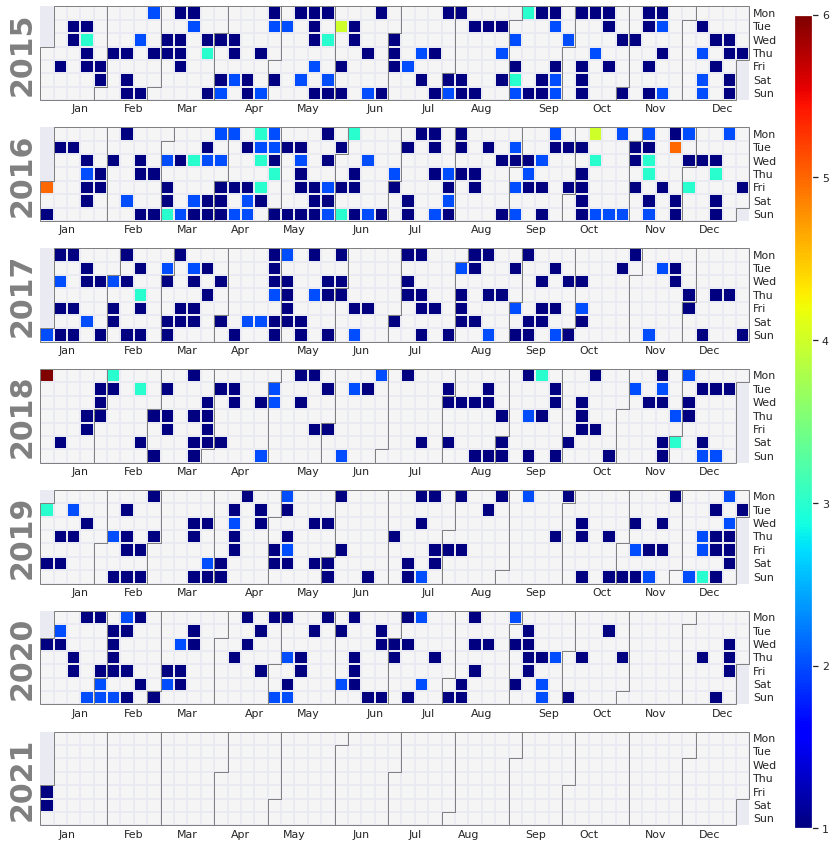

In [ ]:
calplot.calplot(events,cmap='jet')

**¿Qué tareas se puede hacer con la visualización?**

Comparar la cantidad de casos de violencia en el ciclo de vida "adolescencia" en el departamento de Santander según el año. 
Identificar los años en donde hubo más casos de violencia.

**Descripción de un insight encontrado en la visualización:**

Se puede observar que el primer lunes del mes de enero de 2018 se presentaron 6 casos de violencia en adolescentes en el departamento de Santander. 

In [ ]:
#Aclaración
#Hubo 7 casos de violencia en el 2021
Genero[Genero["año"]==2021]

Departamento    Municipio  semana   año Grupo edad Ciclo de vida  \
Orden                                                                    
771      SANTANDER  BUCARAMANGA      53  2021    29 a 59       Adultez   
772      SANTANDER  BUCARAMANGA      53  2021     6 a 11      Infancia   
774      SANTANDER  BUCARAMANGA      53  2021    18 a 28       Jovenes   
775      SANTANDER  BUCARAMANGA      53  2021    29 a 59       Adultez   
778      SANTANDER  BUCARAMANGA      53  2021    12 a 17  Adolescencia   
779      SANTANDER  BUCARAMANGA      53  2021     6 a 11      Infancia   
787      SANTANDER  BUCARAMANGA      53  2021    12 a 17  Adolescencia   

           sexo_                area_            Barrio  \
Orden                                                     
771     Femenino  CABECERA  MUNICIPAL     CAMPO HERMOSO   
772     Femenino  CABECERA  MUNICIPAL            SORELY   
774     Femenino  CABECERA  MUNICIPAL       BETANIA III   
775     Femenino  CABECERA  MUNICIPAL           BETANIA   
778    Masculino  CABECERA  MUNICIPAL  Sin InformaciÃ³n   
779     Femenino  CABECERA  MUNICIPAL           LA JOYA   
787     Femenino  CABECERA  MUNICIPAL       LOS CANELOS   

                      Comuna Tipo de Seguridad Social  pac_hos_ con_fin_  \
Orden                                                                      
771         5 GARCÃA ROVIRA               Subsidiado         2     VIVO   
772              10 PROVENZA            Indeterminado         1     VIVO   
774          3 SAN FRANCISCO             Contributivo         2     VIVO   
775    12 CABECERA DEL LLANO             Contributivo         2     VIVO   
778                 17 MUTIS             Contributivo         2     VIVO   
779         5 GARCÃA ROVIRA             Contributivo         2     VIVO   
787         5 GARCÃA ROVIRA               Subsidiado         1     VIVO   

                              version  naturaleza          def_naturaleza  \
Orden                                                                       
771    SIVIGILA - 2018 -18.1.10$0$0.2           1        Sin informaciÃ³n   
772    SIVIGILA - 2018 -18.1.10$0$0.2           1        Violencia fisica   
774    SIVIGILA - 2018 -18.1.10$0$0.2           1        Violencia fisica   
775    SIVIGILA - 2018 -18.1.10$0$0.2           1        Violencia fisica   
778    SIVIGILA - 2018 -18.1.10$0$0.2           3        Violencia fisica   
779    SIVIGILA - 2018 -18.1.10$0$0.2           3        Violencia fisica   
787    SIVIGILA - 2018 -18.1.10$0$0.2           3  Negligencia y abandono   

       actividad                          nom_actividad  edad_agre  sexo_agre  \
Orden                                                                           
771           31  Persona dedicada al cuidado del hogar        NaN  Masculino   
772           24                             Estudiante        NaN  Masculino   
774           24                             Estudiante        NaN  Masculino   
775           31  Persona dedicada al cuidado del hogar        NaN  Masculino   
778           33                                Ninguna        NaN  Masculino   
779           24                             Estudiante        NaN   Femenino   
787           33                                Ninguna        NaN   Femenino   

      parentezco_vict parentezco_vict_agrupada  sust_vict       fec_hecho  \
Orden                                                                       
771            Pareja                    Otros        NaN  1/01/2021 0:00   
772             Padre                    Padre        NaN  1/01/2021 0:00   
774          Familiar                    Otros        NaN  1/01/2021 0:00   
775            Pareja                    Otros        NaN  1/01/2021 0:00   
778             Padre                    Padre        NaN  1/01/2021 0:00   
779             Madre                    Madre        NaN  1/02/2021 0:00   
787             Madre                    Madre        NaN  1/02/2021 0:00   

    

# Gráfico de lineas

In [7]:
tab1 = Genero['año'].value_counts().reset_index(name='counts') 
tab1 = tab1.rename(columns = {'index':'Año','counts':'Total'})
tab1 = tab1.sort_values('Año')
tab1

Año  Total
1  2015   1833
0  2016   2168
2  2017   1426
4  2018   1146
3  2019   1262
5  2020    953
6  2021      7

In [8]:
import plotly.express as px

fig = px.line(tab1, x="Año", y="Total",text="Total")
fig.update_traces(textposition="bottom right")
fig.show()

**¿Qué tareas se puede hacer con la visualización?**

Observar los casos totales de violencia de genero e intrafamiliar a través del tiempo desde el año 2015 al 2020 para el departamento de Santander.

**Descripción de un insight encontrado en la visualización:**

Podemos analizar el total de casos de violencia de género e intrafamiliar desde el año 2015 al 2020 en el departamento de Santander, registrando su mayor pico de violencia en el año 2016 con un total de 2.168 casos y su menor registro para el año 2021 con tan solo 7 casos. 